In [27]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [28]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../exports/appa2.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)
appa_hours.columns

Index(['Time', 'LaFeO3_1', 'LaFeO3_2', 'STN_1', 'STN_2', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'STN_1_heatR', 'STN_2_heatR', 'LaFeO3_1_heatV',
       'LaFeO3_2_heatV', 'STN_1_heatV', 'STN_2_heatV', 'Temperature',
       'Relative_Humidity', 'Pressure', 'VOC', 'LaFeO3_1_Age', 'LaFeO3_2_Age',
       'STN_1_Age', 'STN_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday',
       'cos_weekday', 'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate',
       'year', 'UV', 'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10',
       'CO', 'NO2'],
      dtype='object')

In [29]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'LaFeO3_1', 'LaFeO3_2',
    'STN_1', 'STN_2',
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'WO3_1_heatR', 'WO3_2_heatR',
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV',
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'sin_month', 'cos_month',
    'UV', 'Wind_Speed',
    'NO2', 'CO'
]]

KeyError: "['ZnOR_1', 'ZnOR_2', 'WO3_1', 'WO3_2', 'ZnOR_1_heatR', 'ZnOR_2_heatR', 'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV', 'ZnOR_2_heatV', 'WO3_1_heatV', 'WO3_2_heatV', 'ZnOR_1_Age', 'ZnOR_2_Age', 'WO3_1_Age', 'WO3_2_Age'] not in index"

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2',
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2',
    'ZnOR_1_heatR', 'ZnOR_2_heatR',
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'WO3_1_heatR', 'WO3_2_heatR',
    'ZnOR_1_heatV', 'ZnOR_2_heatV',
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV',
    'WO3_1_heatV', 'WO3_2_heatV',
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age',
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'WO3_1_Age', 'WO3_2_Age',
    'sin_month', 'cos_month',
    'UV', 'Wind_Speed',
]

#Selecting the target
outs = ['NO2', 'CO']

In [ ]:
from sklearn.model_selection import train_test_split

#splitting the values in training and test
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1600, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 90, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [9, 10, 11]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Choosing the type of model
model = RandomForestRegressor()

In [ ]:
# Performing the RandomForestRegression with a Random Search on hyper-parameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

In [ ]:
#Creating a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('risultati_weather2.csv')

In [ ]:
#Saving the model itself in a .sav file
import pickle

pickle.dump(rf_random, open('random_forest_gridsearch_weather2.sav', 'wb'))

## Results

In [ ]:
#A method to print the performance of the model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f'Average Degrees Error:\n{np.mean(errors)}')
    print(f'Accuracy:\n{accuracy}')
    return accuracy

In [ ]:
base_accuracy = evaluate(rf_random, X_test, Y_test)

In [ ]:
import pickle

rf_random = pickle.load(open("", "rb"))

In [ ]:
accuracy_score(Y_test, rf_random.predict(X_test))

In [36]:
accuracy_score(Y_test, rf_random.predict(X_test))

C:\Users\gabri\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 41 features, but RandomForestRegressor is expecting 37 features as input.

In [84]:
ris.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

## Hyper Parameters Plots

C:\Users\londe\AppData\Local\Temp\ipykernel_12420\230885115.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


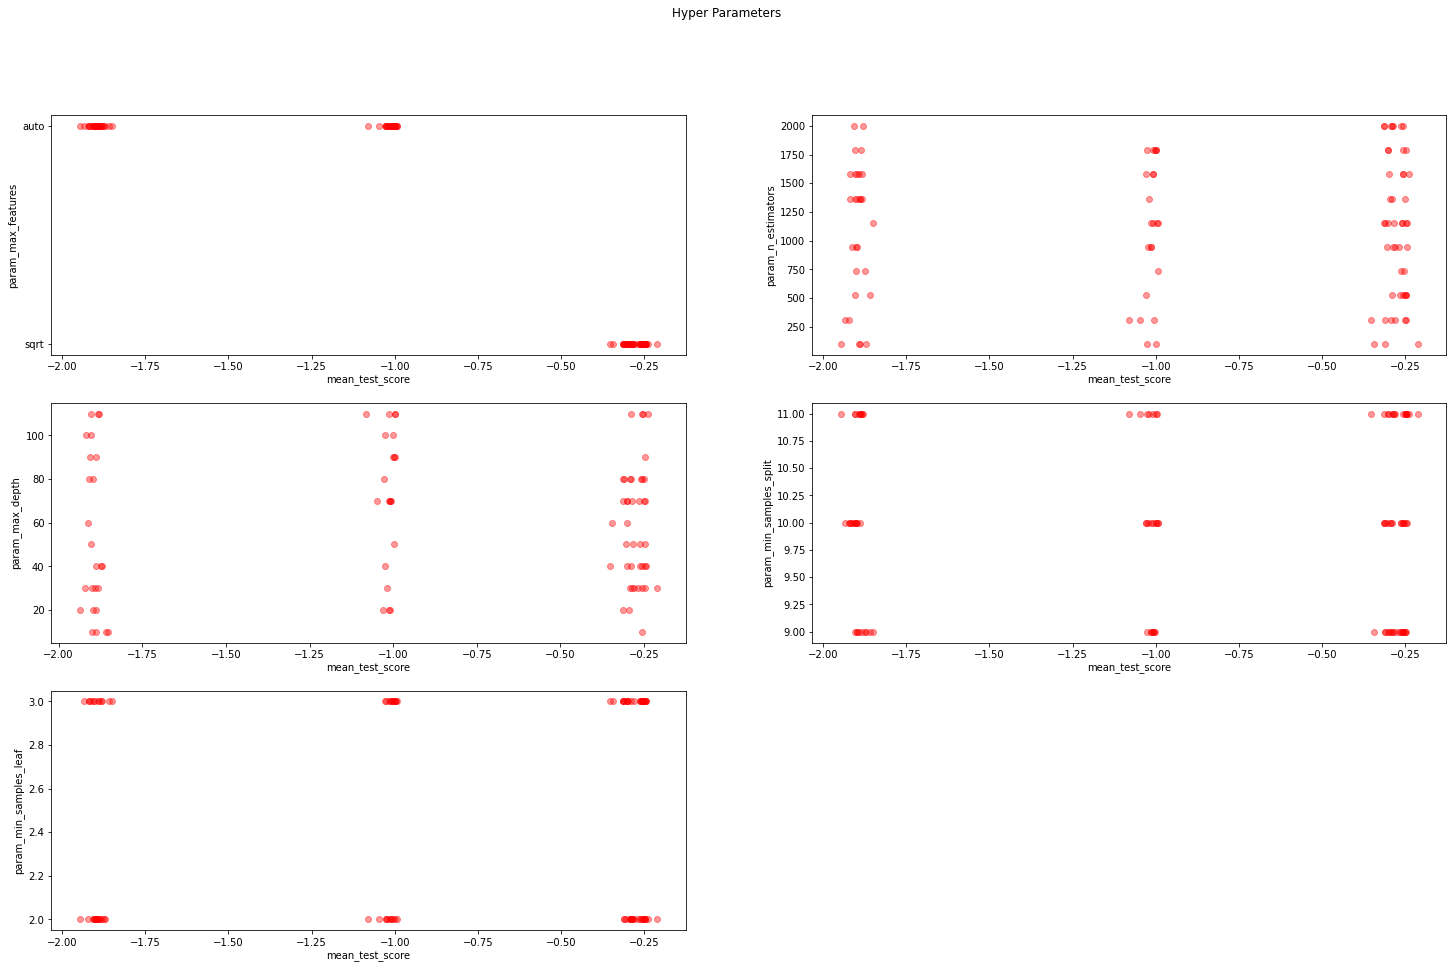

In [85]:
#Plotting the hyper-parameters in relation of mean test score
#Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
#On the X scale, the closer the values are to 0 the better they are

h_params = ['param_max_features','param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

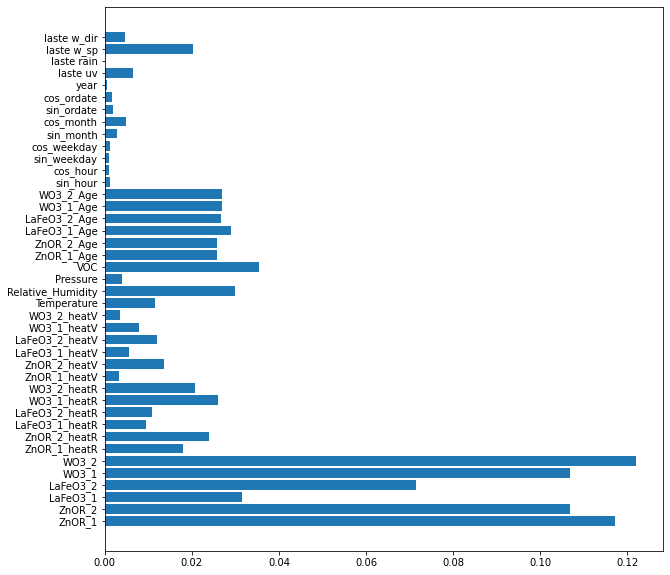

In [86]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()